# Faults

How do models trained on only wind disturbances perform under full/partial motor losses? (Work in progress)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from faults import FaultInjector
from environments import OctorotorEnvSelector
from multirotor.helpers import DataLog
from utilities import get_agent

In [2]:
env_selector = OctorotorEnvSelector()
study, lstm_agent, lstm_params = get_agent('windlstm')
lstm_params['steps_u'] = 50
lstm_params['bounding_rect_length']=1000

[I 2023-11-28 19:24:50,341] Using an existing study with name 'windlstm' instead of creating a new one.


In [3]:
square_np = np.array([[100,0,30], [100,100,30], [0,100,30], [0,0,30]])

In [4]:
done = False
env = env_selector.get_env("lstm", lstm_params, [(0,0),(0,0),(0,0)], square_np, has_turbulence=False, start_alt=30)
state = env.reset()

log = DataLog(env.base_env.vehicle, env.base_env.ctrl,
                  other_vars=('reward',))

i = 0
vels = []
while not done:
    if i == 20:
        faulter = FaultInjector(env)
        env = faulter.inject_full_loss(0)
        
    action = lstm_agent.predict(state, deterministic=True)[0]
    vels.append(action)
    state, reward, done, info = env.step(action)
    print(info)
    log.log(reward=reward)
    i += 1

log.done_logging()

[302.64285 298.4777  298.4702  302.6251  308.4126  312.44534 312.45248
 308.43005]
[303.44797 298.22415 299.55933 302.1607  308.90625 311.4172  312.67865
 307.59915]
[302.21255 300.44064 298.7934  303.98868 307.1893  312.1855  310.51605
 308.7317 ]
[300.42416 302.9998  297.44452 306.25708 305.0594  313.524   307.96536
 310.34296]
[300.57718 303.61746 297.89304 306.54077 304.74442 313.0858  307.36874
 310.22415]
[300.03568 304.86722 297.65417 307.4875  303.79358 313.31467 306.12735
 310.74353]
[299.41574 306.1421  297.37894 308.50443 302.82544 313.60175 304.82587
 311.2781 ]
[301.83212 304.42468 300.14005 306.54718 304.855   310.97986 306.52106
 308.88782]
[305.1025  301.93643 303.67865 303.72086 307.59708 307.49466 309.00287
 305.73224]
[304.30457 303.37686 303.10925 304.8781  306.41907 308.0432  307.60153
 306.55746]
[434.02295 432.27167 433.3129  433.16238 435.27695 435.0533  435.9838
 434.1665 ]
[432.32648 434.37875 431.687   435.0554  433.28763 436.6267  433.92474
 435.95248]
[430.

/home/courseac/miniconda3/envs/supervisor-control/lib/python3.9/site-packages/torch/nn/modules/rnn.py:769: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484775609/work/aten/src/ATen/native/cudnn/RNN.cpp:968.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,


[534.61694 527.2611  534.9546  527.537   535.00165 527.3286  534.664
 527.0527 ]
[534.7136  527.1107  535.0607  527.42126 535.1465  527.2339  534.79944
 526.9232 ]
[533.598   528.1654  533.9622  528.52594 534.10254 528.366   533.73846
 528.00543]
[533.2423  528.46387 533.59705 528.8555  533.79126 528.74115 533.4367
 528.34937]
[532.6578 529.0247 532.9449 529.4042 533.1908 529.375  532.9038 528.9954]
[532.5425  529.1116  532.8761  529.5275  533.12683 529.4686  532.7934
 529.0526 ]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[483.2564  481.01526 483.8247  481.87842 484.47095 481.93433 483.90344
 481.0713 ]
[483.4948  480.80902 483.99698 481.62558 484.64282 481.72818 484.14136
 480.91177]
[483.68246 480.66132 484.13593 481.4339  484.7679  481.5613  484.31503
 480.7889 ]
[483.6

Text(0.5, 1.0, 'Saturation Fault (3800 RPM) using RL Wind Controller')

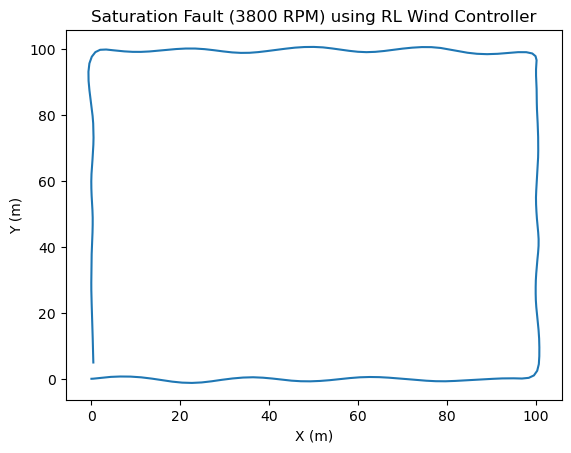

In [8]:
plt.plot(log.x, log.y)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
# plt.ylim(-5,20)
plt.title("Saturation Fault (3800 RPM) using RL Wind Controller")

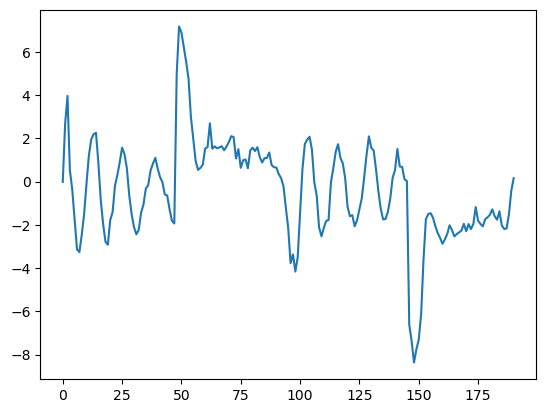

In [6]:
plt.plot(np.array(vels)[:,1]*15)

Text(0.5, 1.0, 'Saturation Fault (3800 RPM) using RL Wind Controller')

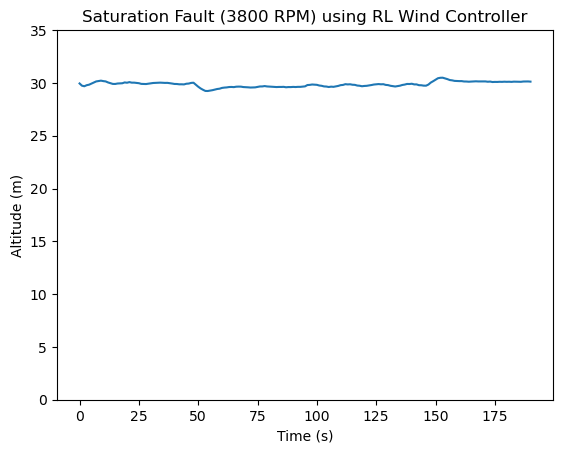

In [7]:
plt.plot(log.z)
plt.ylim(0,35)
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.title("Saturation Fault (3800 RPM) using RL Wind Controller")

In [ ]:
np.linspace(0, -2*np.pi, num=8, endpoint=False) + 0.375 * np.pi

In [ ]:
plt.plot(log.velocity)

In [ ]:
plt.plot(log.orientation)

In [ ]:
plt.plot(log.velocity[:,1], label='vel')
plt.plot(log.target.velocity[:,1], label='target vel')
plt.plot(vels[:,1], label='agent actions')
# plt.plot(log.target.position[:,0]) add in the change in waypoint
plt.legend()

In [ ]:
plt.plot(vels[:,1])

In [ ]:
plt.plot(log.z)

In [ ]:
info